In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
#read data
df = pd.read_csv('y_posts.csv')

1. EDA

In [3]:
df.head()

,UserID,PostID,Age,Country,Followers,PostType,PostHour,PostWeekday,Likes,Shares,Comments,EngagementScore
0,997,0,21,Canada,67,Text,22,Monday,21,4,2,0.447761
1,48,1,47,Canada,407,Video,18,Monday,20,5,4,0.105651
2,301,2,18,USA,174,Text,17,Monday,18,8,4,0.252874
3,880,3,22,UK,53,Video,6,Monday,116,7,10,3.056604
4,189,4,31,France,3,Text,8,Monday,24,5,1,11.666667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           5000 non-null   int64  
 1   PostID           5000 non-null   int64  
 2   Age              5000 non-null   int64  
 3   Country          5000 non-null   object 
 4   Followers        5000 non-null   int64  
 5   PostType         5000 non-null   object 
 6   PostHour         5000 non-null   int64  
 7   PostWeekday      5000 non-null   object 
 8   Likes            5000 non-null   int64  
 9   Shares           5000 non-null   int64  
 10  Comments         5000 non-null   int64  
 11  EngagementScore  5000 non-null   float64
dtypes: float64(1), int64(8), object(3)
memory usage: 468.9+ KB


In [5]:
df.shape

(5000, 12)

In [6]:
df.describe()

,UserID,PostID,Age,Followers,PostHour,Likes,Shares,Comments,EngagementScore
count,5000.0000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,503.7098,2499.500000,34.01800,205.586600,11.762000,28.977600,4.965400,15.295200,1.547303
std,288.4307,1443.520003,9.59565,203.580275,6.937505,27.176946,2.245353,21.652303,4.254233
min,0.0000,0.000000,18.00000,2.000000,0.000000,7.000000,0.000000,0.000000,0.017450
25%,252.0000,1249.750000,25.00000,61.000000,6.000000,17.000000,3.000000,2.000000,0.181470
50%,502.0000,2499.500000,34.00000,149.000000,12.000000,20.500000,5.000000,4.000000,0.440183
75%,756.0000,3749.250000,43.00000,277.250000,18.000000,24.000000,6.000000,8.000000,1.233675
max,999.0000,4999.000000,49.00000,1490.000000,23.000000,177.000000,17.000000,61.000000,121.000000


In [7]:
#cheking for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

#We don't have any missing values

Series([], dtype: int64)

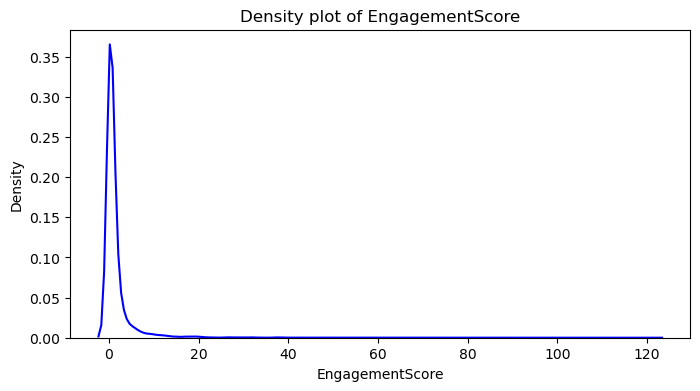

In [8]:
#Density plot of EngagementScore
plt.figure(figsize=(8, 4))
sns.kdeplot(df['EngagementScore'], color="b")
plt.title('Density plot of EngagementScore')
plt.show()

In [9]:
#Calculating skewness and kurtosis for'EngagementScore'
EngagementScore_skewnes = df['EngagementScore'].skew()
EngagementScore_kurtosis = df['EngagementScore'].kurtosis()

print(f'Skewness: {EngagementScore_skewnes}')
print(f'Kurtosis: {EngagementScore_kurtosis}')

Skewness: 10.830923881240238
Kurtosis: 200.00357538393231


The output indicates measurements of the shape of a data distribution:

1. **Skewness (10.830923881240238)**: This is a measure of the asymmetry of the data around its mean. A skewness greater than zero suggests that the data are not symmetric and are skewed to the right, meaning there is a long tail on the right side of the distribution.

2. **Kurtosis (200.00357538393231)**: This is a measure of the 'tailedness' of the distribution. A kurtosis value much greater than 3 (which is the kurtosis of a normal distribution) indicates a distribution with very heavy tails and a sharp peak, meaning there are significant outliers or extreme values more than usual.

PART_2. Explore what factors influence this score.

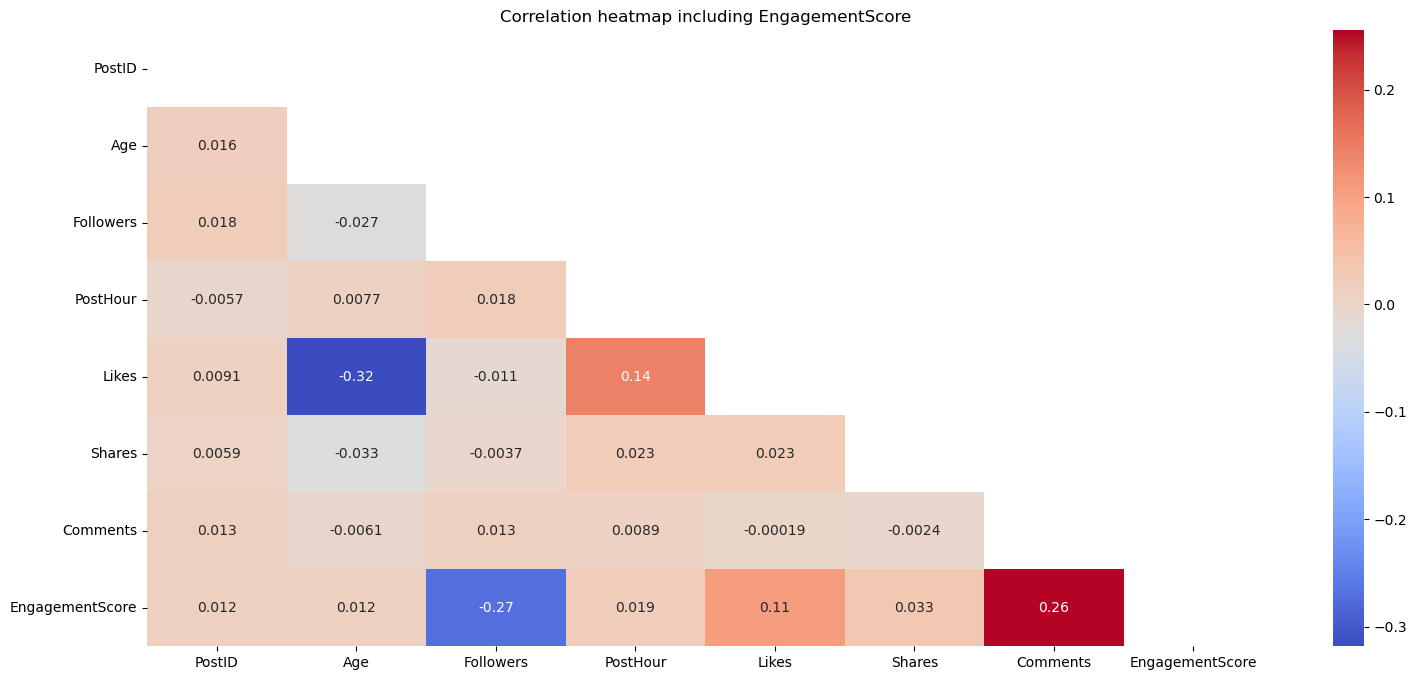

In [10]:
#Selecting only numeric columns from the dataframe. 
numeric_columns = df.select_dtypes(include=[np.number]).drop(columns=['UserID']) #excluded UserID column from data frame 

#Constructing a correlation matrix
correlation_matrix = numeric_columns.corr()

#creating mask for better view
mask = np.triu(correlation_matrix)

#Plotting the correlation matrix as a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation heatmap including EngagementScore')
plt.show()

#The color scale, ranging from cool (blue) to warm (red), indicates the strength and direction of the correlation; 
#Values closer to -1 (cool colors) represent a strong negative correlation, while values closer to +1 (warm colors) indicate a strong positive correlation;
#Values around 0 show a lack of correlation.

Key Observations:
1. EngagementScore and Comments (0.26): A strong positive correlation suggests that posts with more comments tend to have higher engagement scores.
2. EngagementScore and Likes (0.11): A strong positive correlation suggests that posts with more likes tend to have higher engagement scores.
3. EngagementScore and Followers (-0.27): A strong negative correlation suggests that as the EngagementScore increases, the number of Followers tends to decrease, or vice versa. Essentially, it indicates that posts with higher engagement scores might be associated with accounts having fewer followers. This could suggest that posts from smaller accounts might engage their audience more effectively, or that larger follower counts don't always translate into proportionally higher engagement.
4. Likes and PostHour (0.14): A modest positive correlation could imply that posts published at certain hours may receive more likes.
5. Likes and Age (-0.32): A strong negative correlation, suggesting that as the Age variable increases, the number of Likes tends to decrease, or vice versa. In practical terms, this could imply that posts targeting or related to younger age groups may receive more likes, or that content resonating less with older age demographics might get fewer likes.

Numerical correlation not always provides us the whole view, so let's consider some deeper analysis and see categorical features

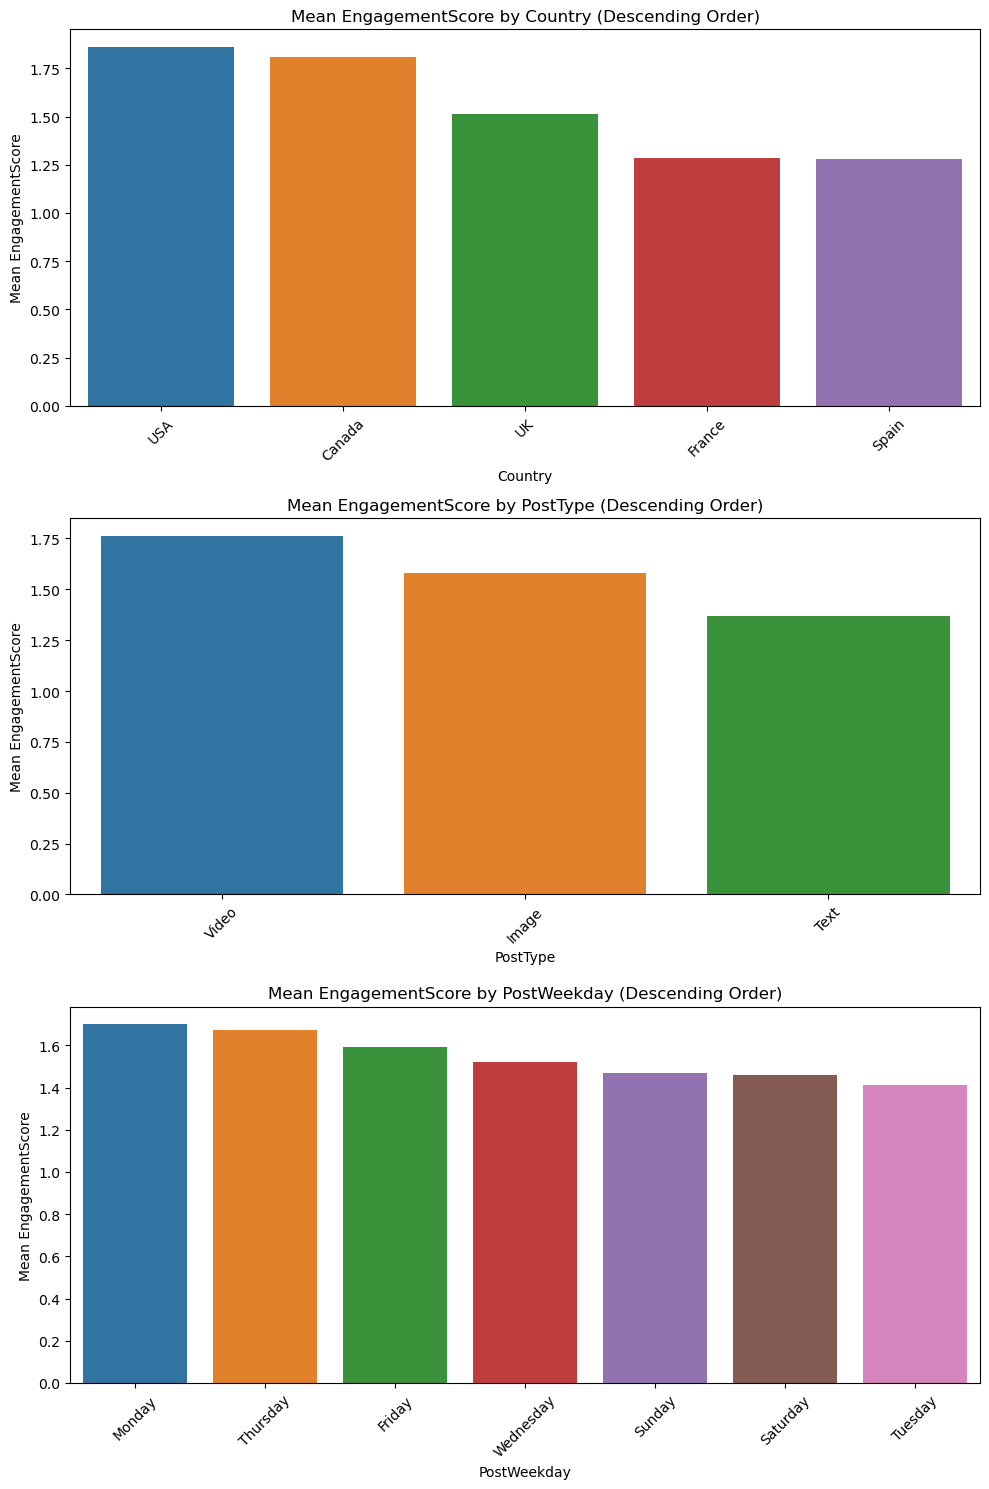

In [11]:
#Define categorical features to analyze
categorical_features = ['Country', 'PostType', 'PostWeekday']

#Initialize a plot grid to visualize each categorical feature
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 15))

#Loop through each categorical feature to analyze and visualize its relationship with EngagementScore
for idx, feature in enumerate(categorical_features):
    #Create a new DataFrame by grouping and sorting in descending order
    category_df = df.groupby(feature)['EngagementScore'].mean().sort_values(ascending=False).reset_index()
    
    #Plot a bar chart in descending order
    sns.barplot(x=feature, y='EngagementScore', hue=feature, data=category_df, ax=axes[idx], dodge=False, legend=False)
    axes[idx].set_title(f"Mean EngagementScore by {feature} (Descending Order)")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Mean EngagementScore")
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Categorical Features:
1.	Country:
USA has the highest average EngagementScore (1.86), followed by Canada (1.81). France and Spain have the lowest averages (around 1.28).
2. PostType:
Video posts have the highest average EngagementScore (1.76), followed by Image (1.58) and Text (1.37).
3. PostWeekday:
Monday has the highest average EngagementScore (1.70), followed by Thursday (1.67) and **Friday** (1.59).


Exploring Factors

In [12]:
# Statistical Analysis: Apply ANOVA/Kruskal-Wallis tests for each categorical feature
anova_results = {}
for feature in categorical_features:
    # Group data by the current feature
    groups = [group['EngagementScore'].values for name, group in df.groupby(feature)]
    
    # Use Kruskal-Wallis test (non-parametric)
    stat, p_value = stats.kruskal(*groups)
    
    # Store the results
    anova_results[feature] = {'statistic': stat, 'p_value': p_value}

print("ANOVA/Kruskal-Wallis Test Results:")
for feature, results in anova_results.items():
    print(f"{feature}: Statistic = {results['statistic']:.2f}, P-Value = {results['p_value']:.5f}")

ANOVA/Kruskal-Wallis Test Results:
Country: Statistic = 38.97, P-Value = 0.00000
PostType: Statistic = 31.85, P-Value = 0.00000
PostWeekday: Statistic = 1.07, P-Value = 0.98265


1. Country- the very low p-value indicates strong evidence to reject the null hypothesis. There is a statistically significant difference in EngagementScore between different countries.
2. PostType - similar to Country, the low p-value suggests a significant difference in EngagementScore between different post types (e.g., Text, Video, Image).
3. PostWeekday - high p-value indicates a failure to reject the null hypothesis. There isn't enough statistical evidence to claim significant differences in EngagementScore between different posting days.

Country and PostType: The significant results for Country and PostType suggest that these features influence EngagementScore. Each group (category) has a distinct impact on user engagement.
PostWeekday: No significant differences in engagement were found between the days of the week, which might suggest that posting day isn't a major factor influencing EngagementScore.

In [13]:
#Feature Importance Analysis: Using RandomForestRegressor
#Prepare the data by dropping unnecessary columns and encoding categorical variables
X = df.drop(columns=['EngagementScore', 'UserID', 'PostID'])
y = df['EngagementScore']
X_encoded = pd.get_dummies(X, drop_first=True)

In [14]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [15]:
# Train the model and get feature importance
rf_model.fit(X_encoded, y)
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Analysis:")
print(feature_importance_df)


Feature Importance Analysis:
                  Feature  Importance
1               Followers    0.624776
5                Comments    0.283691
3                   Likes    0.062518
0                     Age    0.005935
2                PostHour    0.005878
10          PostType_Text    0.004346
9             Country_USA    0.003197
4                  Shares    0.003160
11         PostType_Video    0.001954
15   PostWeekday_Thursday    0.001724
12     PostWeekday_Monday    0.001588
7           Country_Spain    0.000508
8              Country_UK    0.000219
13   PostWeekday_Saturday    0.000123
6          Country_France    0.000111
14     PostWeekday_Sunday    0.000107
17  PostWeekday_Wednesday    0.000085
16    PostWeekday_Tuesday    0.000078


Top numerical Features:
  1. Followers: The most important feature, accounting for 62.5% of the importance.
  2. Comments: The second most influential feature 28.4%.
  3. Likes: The third, with 6.2%.


These findings highlight that the number of followers and user interactions (comments and likes) are crucial predictors of EngagementScore.

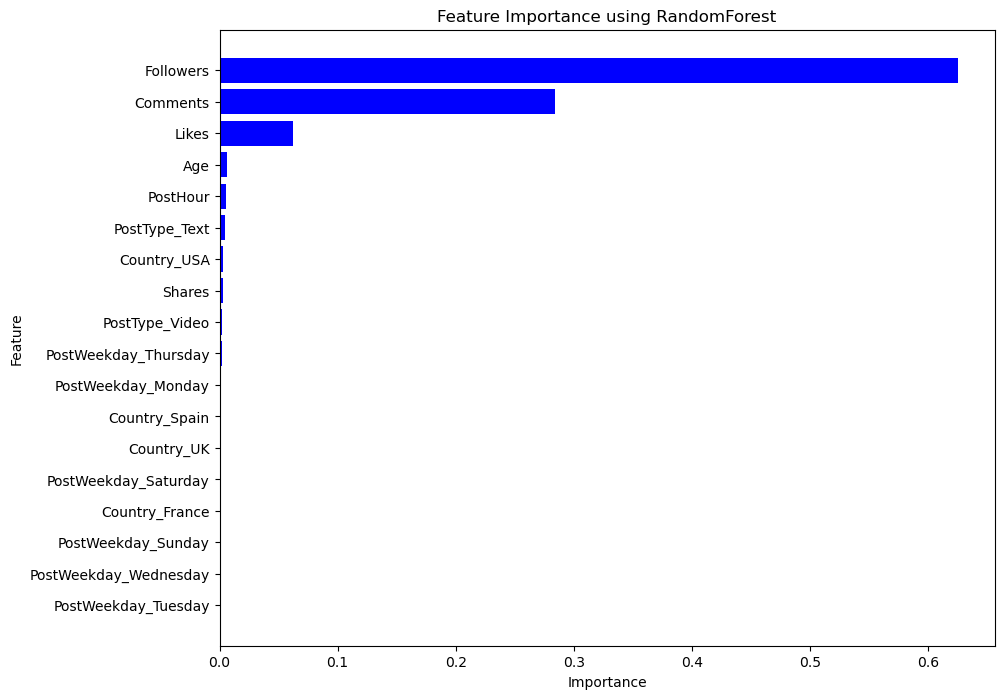

In [16]:
# Optionally, visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using RandomForest')
plt.gca().invert_yaxis()
plt.show()

PART_3. Determine how the EngagementScore is calculated based on various user and post feature.

Let's build a Random Forest model with droping such features'EngagementScore', 'UserID', 'PostID'

In this model we will predict EngagementScore using such features as 'Followers', 'Likes', 'Comments' and others.

In [17]:
# Prepare the dataset: Drop irrelevant columns and encode categorical variables
X = df.drop(columns=['EngagementScore', 'UserID', 'PostID'])
y = df['EngagementScore']
X_encoded = pd.get_dummies(X, drop_first=True) #pd.get_dummies(): Encodes categorical data and keeps numerical data unchanged. 
#drop_first=True prevents multicollinearity by dropping one category from each categorical variable.

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [21]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.1763
Root Mean Squared Error: 0.4198
R² Score: 0.9825


These metrics show that the model predicts EngagementScore with high accuracy, capturing over 98% of the variance. The low MSE indicates that the predicted scores are close to the actual scores.

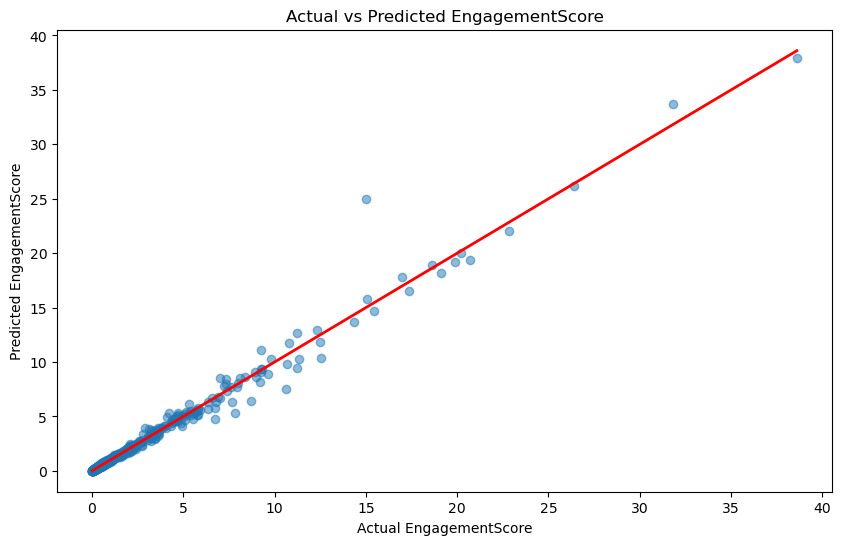

In [22]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
plt.xlabel('Actual EngagementScore')
plt.ylabel('Predicted EngagementScore')
plt.title('Actual vs Predicted EngagementScore')
plt.show()

Summary of Findings:
1. Feature Importance:
Followers, Comments and Likes were the strongest predictors of EngagementScore, suggesting that the user's follower base, audience engagement through comments and like reactions are crucial.
2. Grouping Analysis:
PostType: Videos achieve the highest engagement.
PostWeekday: Mondays and Thursdays tend to perform best.
3. Model Performance:
The RandomForestRegressor accurately forecasts the EngagementScore for posts.

PART_4. Predicting the Unpredictable

Here we will try to predict the EngagementScore without such features 'Followers', 'Likes', 'Comments'. So imagine that's it a new 'post' without 'Followers', 'Likes', 'Comments'

In [39]:
# Prepare the dataset: Drop irrelevant columns and encode categorical variables
X = df.drop(columns=['EngagementScore', 'UserID', 'PostID', 'Followers', 'Likes', 'Comments'])
y = df['EngagementScore']
X_encoded = pd.get_dummies(X, drop_first=True) #pd.get_dummies(): Encodes categorical data and keeps numerical data unchanged. 
#drop_first=True prevents multicollinearity by dropping one category from each categorical variable.

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [41]:
# Initialize and train a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [43]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 12.5712
Root Mean Squared Error: 3.5456
R² Score: -0.2499


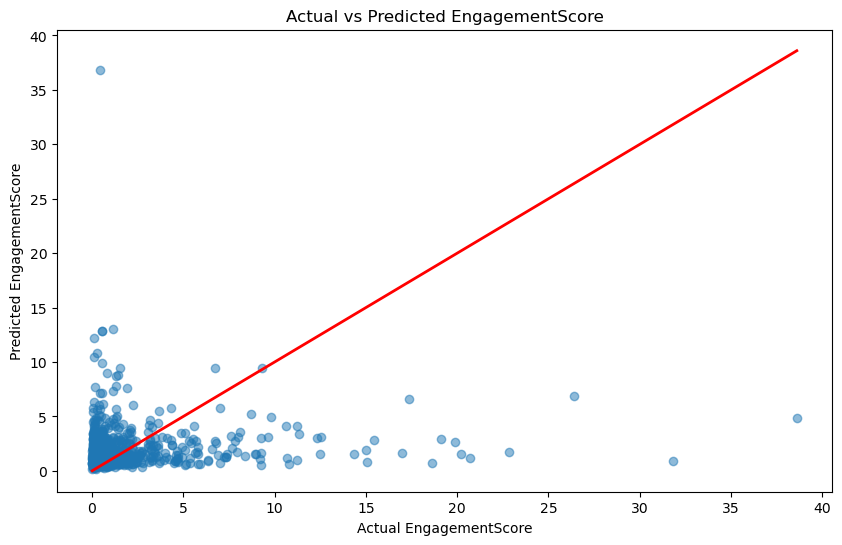

In [44]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
plt.xlabel('Actual EngagementScore')
plt.ylabel('Predicted EngagementScore')
plt.title('Actual vs Predicted EngagementScore')
plt.show()

In my opinion, predicting EngagementScore without 'Followers', 'Likes', 'Comments' does not make sense, because these features have the greatest impact on this score. When we have a new post, if there is no comment, like, or no followers, then this post will have almost zero score. So this post (video) should be really interesting and if people will be intrested the post will receive comments, likes and followers as a result the EngagementScore will be growth.